# Activity 1: Build a simple linear regression model

Now it's over to you to build a linear regression model based on the social media dataset. This dataset contains information about the number of friends on Facebook and the number of groups. Your goal is to find out whether the number of Facebook groups a person belongs to can explain the number of friends they have on the social network.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Read in the data 
social_media = pd.read_csv("social_media.csv")
social_media.head(10)

,NBRfriends,NBRgroups
0,280,9
1,104,6
2,1307,24
3,269,5
4,437,9
5,677,22
6,74,0
7,63,3
8,576,21
9,2780,10


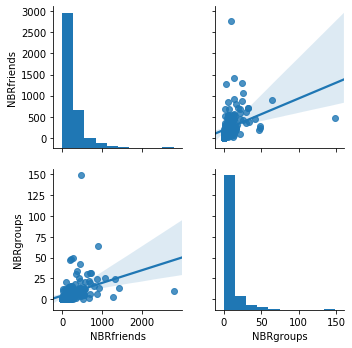

In [3]:
#Make a pair plot from the seaborn package
import seaborn as sea 
sea.pairplot(social_media, kind = "reg")
plt.show()

Linear regression seems plausible, but the data is very skewed and there are some outliers that might clutter our model. You can choose to make a model without addressing these issues, however, your model will be more performant when transforming your data. 

Now, it is up to you to perform the next steps: 
   1. Split the data into a training and test set. 
   2. Build a simple linear regression model on the test set and interpret the coefficients of the estimates and the model. 
   3. Make predictions on the test set and evaluate using MAE and RMSE. 

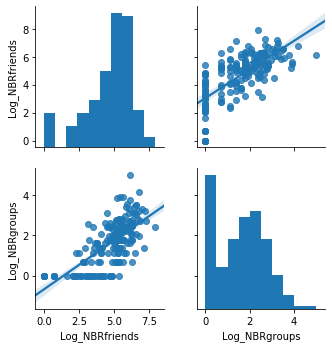

In [4]:
#Transform both varaibles to log
social_media_log = pd.DataFrame()

#We perform a log(x+1) tranformation since values of 0 would give inf
social_media_log[["Log_NBRfriends"]] = np.log(social_media[["NBRfriends"]]+1)
social_media_log[["Log_NBRgroups"]] = np.log(social_media[["NBRgroups"]]+1)

#Build the seaborn plot again
sea.pairplot(social_media_log, kind = "reg")
plt.show()

Both the histogram and the scatter plot look better know, as we clearly notice a straight line through the data points. The histogram also tends towards a normal distribution. However, there might be some outliers still ahead, so let's try to see this by building a boxplot.

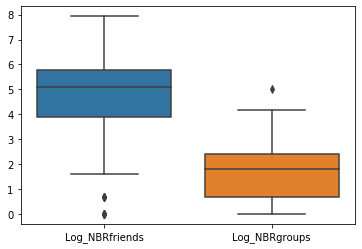

In [5]:
sea.boxplot(data=social_media_log)
plt.show()

There are two outliers for the number of friends and 1 outlier for the number of groups. Outliers are determined as observations outside the whiskers of the boxplot. In mathematical terms, these are observations outside the range of ]Q1 - 1.5IQR, Q3 + 1.5 IQR[, where IQR stands for the interquartile range (IQR = Q3-Q1) and Q1 is the first quartile (or the 25% percentile) and Q3 the third quartile (or the 75% percentile). The first (third) quartile is a number for which 25% (75%) of the data points lie below and 75% (25%) lie above this number. It is now up to you to delete outliers that are outside the whiskers of the boxplot.

In [73]:
#Make a function to detect outliers 
#The function takes the data as input and 
#returns the min (Q1 - 1.5IQR) and
#max (Q3 + 1.5 IQR) values (= the whiskers of the boxplot)

def get_outliers(data):
    
    min_value = max_value = 0
    data = data.sort_values()

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    min_value = Q1 - (1.5 * IQR)
    max_value = Q3 + (1.5 * IQR)
    
    return min_value,max_value

In [76]:
outliers_friends

(1.0080437505546147, 8.655995276289625)

In [77]:
outliers_friends= get_outliers(social_media_log.Log_NBRfriends)
assert np.allclose(outliers_friends,(1.0080437505546147, 8.6559952762896248))


###
### AUTOGRADER TEST - DO NOT REMOVE
###


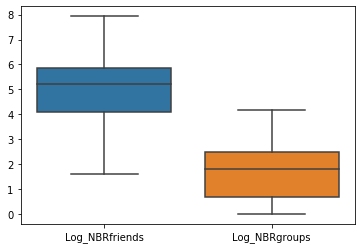

In [79]:
#To make sure that everyone has the solution and can continue with the exercise, I provide the outliers
outliers_friends= (1.0080437505546147, 8.6559952762896248)
outliers_groups = (-1.8966042241688035, 5.0093995217745269)

#All the values that fall out the above ranges are considered outliers, so we have to keep all the values within this range
social_media_cleaned = social_media_log[((social_media_log["Log_NBRfriends"] > outliers_friends[0]) &
                 (social_media_log["Log_NBRfriends"] < outliers_friends[1])) &
                ((social_media_log["Log_NBRgroups"] > outliers_groups[0]) &
                (social_media_log["Log_NBRgroups"] < outliers_groups[1]))]

#Make a boxplot to see whether there are outliers 
sea.boxplot(data=social_media_cleaned)   
plt.show()

### Modelling
Now that you have deleted the outliers, you can start modelling the simple linear regression model. Always build two models: one without the logs and one with the logs, so that you can see the difference. You should use the *statsmodels* package since this is more convenient to interpret the output. First, we will make a train/test split.

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

np.random.seed(40)

#Make a train and test split (70/30)
train, test = train_test_split(social_media, test_size=0.30)
train_log, test_log = train_test_split(social_media_log, test_size=0.30)

#Add the intercept
train = sm.add_constant(train)
test = sm.add_constant(test)

train_log = sm.add_constant(train_log)
test_log = sm.add_constant(test_log)

C:\Users\goodsma\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [91]:
#Make function that calculates an OLS model with the statsmodels package
#You should output the OLS object
def fit_ols(data, xvars, yvars):
    
    linreg = sm.OLS(data[yvars],data[xvars]).fit()
    
    return linreg

Verify your results:

In [92]:
linreg = fit_ols(data=train, xvars=["const","NBRgroups"], yvars="NBRfriends")
linreg_log = fit_ols(data=train_log, xvars=["const","Log_NBRgroups"], yvars= "Log_NBRfriends")

assert np.allclose(linreg.params,(168.812153,11.925267))


###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [87]:
#Let's have a look at the output:
print(linreg.summary()), print(linreg_log.summary())

                            OLS Regression Results                            
Dep. Variable:             NBRfriends   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     19.37
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           2.14e-05
Time:                        03:26:26   Log-Likelihood:                -1004.9
No. Observations:                 140   AIC:                             2014.
Df Residuals:                     138   BIC:                             2020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        168.8122     34.609      4.878      0.0

(None, None)

Try answering the following questions:
- What do you notice when looking at the R-squared of both models? Which one is better?
- Interpret the coefficients of the normal model and the logarithmic model. 

### Prediction

Now that you have built a simple linear regrssion model, make a prediction on the test set using this model. Since you used the *statsmodels* package earlier, use it again now. To practise, you could try the example using the *sklearn* package.  

In [88]:
#Make a function that predicts on the test set
#Output your predictions
def make_predictions(model, data):
    
    pred=model.predict(data)
    
    return pred

Verify your results:

In [93]:
#Make predictions
pred = make_predictions(model = linreg,data = test[["const","NBRgroups"]])

#Evaluate performance
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

print("MAE: "+str(mae(test[["NBRfriends"]],pred)))
print("RMSE: "+str(np.sqrt(mse(test[["NBRfriends"]],pred))))
print("R-squared: "+str(r2(test[["NBRfriends"]],pred)))

MAE: 164.2925266647449
RMSE: 257.87011943785717
R-squared: -0.23248837411372691


In [90]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Calculate the performance of the logarithmic model yourself. What do you notice? Which model gives the best results? Is there somehting strange about the performance results of the normal model?